# Final Project

In [1]:
# import libraries
# set up plot configurations (if required)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, tree, ensemble, neighbors
from sklearn import model_selection, metrics, preprocessing

from __future__ import division, print_function

%matplotlib inline

# Executive Summary

ShareCity is an ongoing research project that is carried out by a team of passionate researchers. They have an online database (SHARECITY100) which documents the practice of food sharing by ICT-enabled organisations across 100 cities around the world, including Asia, Africa, Australia, North and South America, and Europe. The database is open-access, and the researchers' motivation for creating SHARECITY100 was to make visible the landscape of food sharing in cities by mapping it consistently across a large number of cities. See: http://sharecity.ie/

The database was downloaded for this project. There are 4000+ entries, with 50 entries for Singapore alone. Food sharing is an international movement and it is interesting to see what is happening globally. How does Singapore rank with other Asia cities, and those in other parts of the world? Which cities are top in terms of food sharing? What is shared, and how?

In this project, clustering (unsupervised learning) and aggregate information will be used across different groups in different parts of Asia and globally, what metrics can we already compute that can be used as dimensions for clustering or visualisation? e.g. number of organisations, number of shared kitchen space, number of shared land.


# Risk and Assumptions

Although research is ongoing, data is comprehensive enough to highlight trends in different cities

# Hypothesis

Null hypothesis, $H_0$: There is no pattern that emerge between Singapore and other cities in Asia, and globally

Alternative hypothesis, $H_1$: There are interesting patterns that emerge between Singapore and other cities in Asia, and globally

# Exploratory Data Analysis

In [2]:
ShareCity_All = pd.read_csv("data/ShareCity_AllCities_Cleaned.csv")

In [3]:
ShareCity_All.head()

,City,Org_Name,Online_Web,Online_FB,Online_Twitter,Share_Land,Share_Plants,Share_Seeds,Share_Compost,Share_Kitchen,...,How_Selling,How_Bartering,How_Gifting,How_Collecting,Type_ForProfit,Type_SocialEnterprise,Type_NonProfit,Type_Cooperative,Type_Association,Type_Informal
0,Adelaide,Adelaide Central Market Community Kitchen,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Adelaide,Adelaide Hills Produce Swap,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Adelaide,Adelaide Kitchen Gardeners,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Adelaide,Adelaide Local Exchange Trading System,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Adelaide,Australian City Farms and Community Gardens Ne...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
ShareCity_All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 24 columns):
City                     4011 non-null object
Org_Name                 4011 non-null object
Online_Web               4011 non-null float64
Online_FB                4011 non-null float64
Online_Twitter           4011 non-null float64
Share_Land               4011 non-null float64
Share_Plants             4011 non-null float64
Share_Seeds              4011 non-null float64
Share_Compost            4011 non-null float64
Share_Kitchen            4011 non-null float64
Share_Food               4011 non-null float64
Share_Meals              4011 non-null float64
Share_Knowledge          4011 non-null float64
Share_Skills             4011 non-null float64
How_Selling              4011 non-null float64
How_Bartering            4011 non-null float64
How_Gifting              4011 non-null float64
How_Collecting           4011 non-null float64
Type_ForProfit           4011 non-null float64
Ty

There are 4012 entries in the ShareCity database, and 24 columns of object information. Besides the city and the name of the organisation, there are columns on the organisation's online presence, what is being shared, how sharing was being carried out, and the type of organisation. All entries have complete data entries. Most of the columns are similar to dummy variables, in that the information is float.

| Column | Type | Description |
| --- | --- | --- | --- |
| City | Object | City |
| Org_Name | Object | Organisation name |
| Online_Web | Object | Online presence - Website |
| Online_FB | Object | Online presence - Facebook |
| Online_Twitter | Object | Online presence - Twitter|
| Share_Land | Object | What is shared - Land |
| Share_Plants | Object | What is shared - Plants |
| Share_Seeds | Object | What is shared - Seeds |
| Share_Compost | Object | What is shared - Compost |
| Share_Kitchen | Object | What is shared - Kitchen |
| Share_Food | Object | What is shared - Food |
| Share_Meals | Object | What is shared - Meals |
| Share_Knowledge | Object | What is shared - Knowledge |
| Share_Skills | Object | What is shared - Skills |
| How_Selling | Object | How is the sharing done - By selling |
| How_Bartering | Object | How is the sharing done - By bartering |
| How_Gifting | Object | How is the sharing done - By gifting |
| How_Collecting | Object | How is the sharing done - By collecting |
| Type_ForProfit | Object | Type of organisation - For profit |
| Type_SocialEnterprise | Object | Type of organisation - Social enterprise |
| Type_NonProfit | Object | Type of organisation - Non-profit |
| Type_Cooperative | Object | Type of organisation - Cooperative |
| Type_Association | Object | Type of organisation - Association |
| Type_Informal | Object | Type of organisation - Informal |


In [5]:
ShareCity_All.describe()

,Online_Web,Online_FB,Online_Twitter,Share_Land,Share_Plants,Share_Seeds,Share_Compost,Share_Kitchen,Share_Food,Share_Meals,...,How_Selling,How_Bartering,How_Gifting,How_Collecting,Type_ForProfit,Type_SocialEnterprise,Type_NonProfit,Type_Cooperative,Type_Association,Type_Informal
count,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,...,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000
mean,0.997258,0.552979,0.350037,0.234356,0.118175,0.118175,0.056345,0.088756,0.384193,0.364248,...,0.428571,0.080279,0.594365,0.101222,0.249564,0.058340,0.347544,0.062578,0.274246,0.201945
std,0.052303,0.497247,0.477041,0.423648,0.322855,0.322855,0.230616,0.284427,0.486465,0.481279,...,0.494933,0.271759,0.491076,0.301660,0.432814,0.234414,0.476250,0.242232,0.446189,0.401501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
ShareCity_All['City'].value_counts()[:5]

London           203
New York City    185
Melbourne        166
Berlin           128
Barcelona        113
Name: City, dtype: int64

In [7]:
ShareCity_All['City'].value_counts()[95:]

Jackson         8
Media           7
Dakar           6
Doha            5
Porto Alegre    4
Name: City, dtype: int64

A total of 100 cities are in the ShareCity database. The top 5 cities with documented food sharing organisations in the database are London (203), New York City (185), Melbourne (166), Berlin (128) and Barcelona (113). The bottom 5 are Jackson, Media, Dakar, Doha, Porto Alegre with 8 or less documented food sharing organisations. Singapore has 50 documented food sharing organisations on the list.

In [8]:
ShareCity_Cityf = ShareCity_All['City'].value_counts()

In [9]:
ShareCity_Cityf.median()

35.5

The median number of food sharing organisations in a city listed in ShareCity organisation is 35.5.

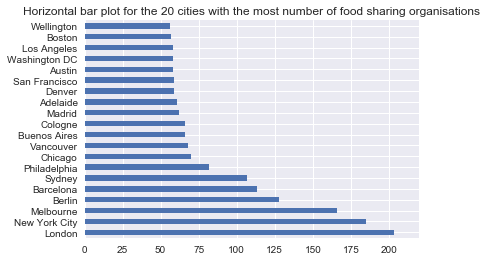

In [10]:
ShareCity_Cityf[:20].plot(kind='barh')
plt.title("Horizontal bar plot for the 20 cities with the most number of food sharing organisations");
plt.xlim(0, 220);

London is the city with the most number of food sharing organisations. The number of food sharing organisations drops visibly from the city with 3rd highest number of food sharing organisations to the city with 4th highest number of similar organisations. Another significant drop occurs between Sydney (6th highest) and Philapdelphia (7th highest). The number of food sharing organisations in a city continues dropping, although at a much slower pace.

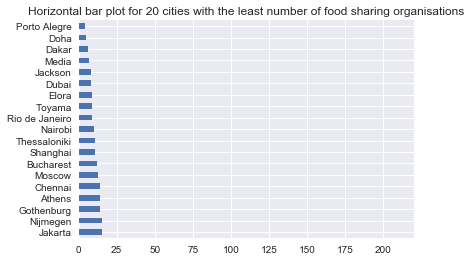

In [11]:
ShareCity_Cityf[81:100].plot(kind='barh')
plt.title("Horizontal bar plot for 20 cities with the least number of food sharing organisations");
plt.xlim(0, 220);

The 20 cities with the least number of food sharing organisations have less than 25

In [12]:
ShareCity_Online = ShareCity_All[['City', 'Org_Name', 'Online_Web', 'Online_FB', 'Online_Twitter']]

In [13]:
ShareCity_Online.head()

,City,Org_Name,Online_Web,Online_FB,Online_Twitter
0,Adelaide,Adelaide Central Market Community Kitchen,1.0,1.0,1.0
1,Adelaide,Adelaide Hills Produce Swap,1.0,0.0,0.0
2,Adelaide,Adelaide Kitchen Gardeners,1.0,0.0,0.0
3,Adelaide,Adelaide Local Exchange Trading System,1.0,1.0,0.0
4,Adelaide,Australian City Farms and Community Gardens Ne...,1.0,1.0,1.0


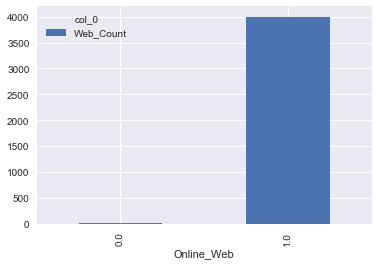

In [14]:
web_tab = pd.crosstab(index = ShareCity_Online["Online_Web"], columns="Web_Count")
web_tab.plot.bar()

In [15]:
web_tab/web_tab.sum()

col_0,Web_Count
Online_Web,
0.0,0.002742
1.0,0.997258


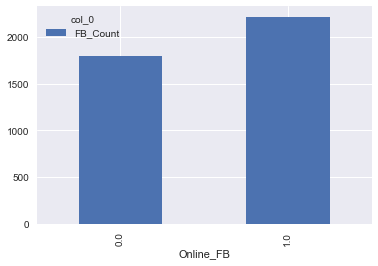

In [16]:
FB_tab = pd.crosstab(index = ShareCity_Online["Online_FB"], columns="FB_Count")
FB_tab.plot.bar()

In [17]:
FB_tab/FB_tab.sum()

col_0,FB_Count
Online_FB,
0.0,0.447021
1.0,0.552979


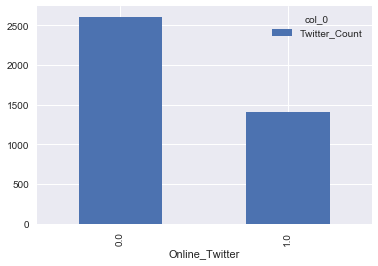

In [18]:
twitter_tab = pd.crosstab(index = ShareCity_Online["Online_Twitter"], columns="Twitter_Count")
twitter_tab.plot.bar()

In [19]:
twitter_tab/twitter_tab.sum()

col_0,Twitter_Count
Online_Twitter,
0.0,0.649963
1.0,0.350037


99.7% of all food sharing organisations had a web page. 55.2% had a Facebook page, and just over a third (35.0%) had a Twitter account.

In [20]:
SCOnline_Pivot = pd.pivot_table(ShareCity_Online,index=["City","Org_Name"])
SCOnline_Pivot.head()

Online_FB  \
City     Org_Name                                                        
Adelaide Adelaide Central Market Community Kitchen                 1.0   
         Adelaide Hills Produce Swap                               0.0   
         Adelaide Kitchen Gardeners                                0.0   
         Adelaide Local Exchange Trading System                    1.0   
         Australian City Farms and Community Gardens Net...        1.0   

                                                             Online_Twitter  \
City     Org_Name                                                             
Adelaide Adelaide Central Market Community Kitchen                      1.0   
         Adelaide Hills Produce Swap                                    0.0   
         Adelaide Kitchen Gardeners                                     0.0   
         Adelaide Local Exchange Trading System                         0.0   
         Australian City Farms and Community Gardens Net...             1.0   

                                                             Online_Web  
City     Org_Name                                                        
Adelaide Adelaide Central Market Community Kitchen                  1.0  
         Adelaide Hills Produce Swap                                1.0  
         Adelaide Kitchen Gardeners                                 1.0  
         Adelaide Local Exchange Trading System                     1.0  
         Australian City Farms and Community Gardens Net...         1.0

In [21]:
SCOnline_PivotSum = pd.pivot_table(ShareCity_Online,index=["City"], values=["Online_Web", "Online_FB", "Online_Twitter"], aggfunc=np.sum)
SCOnline_PivotSum.head()

,Online_FB,Online_Twitter,Online_Web
City,,,
Adelaide,37.0,20.0,61.0
Amsterdam,20.0,13.0,30.0
Ann Arbor,16.0,13.0,35.0
Asheville,18.0,12.0,39.0
Athens,6.0,5.0,14.0


In [43]:
Asia = ['Beijing', 'Bengaluru', 'Chennai', 'Hong Kong', 'Jakarta', 'Kuala Lumpur', 'Manila', 'Seoul', 'Shanghai', 'Singapore', 'Tokyo', 'Toyama']

In [35]:
ShareCity_Online.head()

,City,Org_Name,Online_Web,Online_FB,Online_Twitter
0,Adelaide,Adelaide Central Market Community Kitchen,1.0,1.0,1.0
1,Adelaide,Adelaide Hills Produce Swap,1.0,0.0,0.0
2,Adelaide,Adelaide Kitchen Gardeners,1.0,0.0,0.0
3,Adelaide,Adelaide Local Exchange Trading System,1.0,1.0,0.0
4,Adelaide,Australian City Farms and Community Gardens Ne...,1.0,1.0,1.0


In [33]:
def Region(dataframe):
    if dataframe['City'] in Asia:
        dataframe['Region'] == "Asia"
    else:
         dataframe['Region'] == ""

In [49]:
def Region(city):
    if city in Asia:
        return "Asia"
    else:
        return "Others"

In [50]:
ShareCity_Online['Region'] = ShareCity_Online['City'].map(Region)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
ShareCity_Online[ShareCity_Online['Region'] == 'Asia']

,City,Org_Name,Online_Web,Online_FB,Online_Twitter,Region
400,Beijing,Beijing Vegan and Vegetarian Meetup,1.0,0.0,0.0,Asia
401,Beijing,Cenfang,1.0,0.0,0.0,Asia
402,Beijing,Clean Your Plate,1.0,0.0,0.0,Asia
403,Beijing,Eat a Few Tons,1.0,0.0,0.0,Asia
404,Beijing,Food Not Bombs,1.0,0.0,0.0,Asia
405,Beijing,Good Cook (Hao Chushi),1.0,0.0,0.0,Asia
406,Beijing,Home Eat,1.0,0.0,0.0,Asia
407,Beijing,Home-Cooking (Huijia Chifan),1.0,0.0,0.0,Asia
408,Beijing,HomeShop - WaoBao!,1.0,0.0,0.0,Asia
409,Beijing,I Have a Meal,1.0,0.0,0.0,Asia
